## **Dataset Exploration***
In the following we will analyse the dataset used for our research. This allows proper pre-processing and a sound research design enabling meaningful insights. 
The primary aim is to understand the structure of each dataset, which allows us to unify them to construct the final dataset, and to analyze the data distribution and characteristics, which enables efficient sampling. 

The dataset used for our research are: FinQA, ConFinQA, and FinDER.


In [ ]:
# import all relevant libraries
import json
import random
import os
import pandas as pd

### **1. First Dataset Insepection**

**Load and Inspect the Samples**

In [ ]:
# Import necessary libraries
import sys
sys.path.append('../src')
import json
from pathlib import Path
# For better display in notebooks
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

#### FinQA

In [ ]:
import json
from pathlib import Path

finQA_train_file = Path("/Users/christel/Desktop/Thesis/thesis_repo/data/FinQA/train.json")
with open(finQA_train_file, 'r') as f:
    finQA_train_data = json.load(f)

print(f"Loaded {len(finQA_train_data)} training examples")
print(f"Data type: {type(finQA_train_data)}")

In [ ]:
# Inspect the structure of the first sample
finQA_first_sample = finQA_train_data[0]
print(f"Sample type: {type(finQA_first_sample)}")
print(f"Sample keys: {list(finQA_first_sample.keys())}")
print(f"Number of keys: {len(finQA_first_sample.keys())}")

In [ ]:
print(finQA_first_sample)

In [ ]:
# Detailed inspection of the first sample
for key, value in finQA_first_sample.items():
    print(f"\n📋 {key}:")
    if isinstance(value, str):
        print(f"   Type: string (length: {len(value)})")
        print(f"   Preview: {value[:100]}{'...' if len(value) > 100 else ''}")
    elif isinstance(value, list):
        print(f"   Type: list (length: {len(value)})")
        if len(value) > 0:
            print(f"   First item type: {type(value[0])}")
            if isinstance(value[0], dict):
                print(f"   First item keys: {list(value[0].keys())}")
    elif isinstance(value, dict):
        print(f"   Type: dict (keys: {list(value.keys())})")
    else:
        print(f"   Type: {type(value)}")
        print(f"   Value: {value}")

In [ ]:
print(find_empty_gold_references_per_dataset("/Users/christel/Desktop/Thesis/thesis_repo/data/data_processed/Train_Val_Test/df_test.json"))

In [ ]:
print(find_empty_gold_references_per_dataset("/Users/christel/Desktop/Thesis/thesis_repo/data/data_processed/Train_Val_Test/df_test.json"))

In [ ]:
print(find_empty_gold_references_per_dataset("/Users/christel/Desktop/Thesis/thesis_repo/data/data_processed/Train_Val_Test/df_test.json"))

In [ ]:
for col, value in finQA_first_sample.items():
    print(f"{col}: {value}\n")

**FinQA: Each training example is a dictionary with 11 keys:** <br>
"pre_text": the texts before the table; <br>
"post_text": the text after the table;<br>
"filename": name of the pdf file <br>
"table_ori": The original version of the table, as extracted from the document, before any preprocessing or normalization.<br>
"table": the table;<br>
"qa": {<br>
  "question": the question;<br>
  "answer": The final numeric/textual answer to the question.<br>
  "explenation": Optional human-written explanation for the answer (often empty in FinQA)<br>
  "ann_table_rows": Indices of table rows that are annotated as relevant (if the answer comes from a table).<br>
  "ann_text_rows": Indices of relevant text passages (e.g., [1] refers to text_1) from model_input.<br>
  "steps" ("op": operation, "arg1; arg2": operands; "res": result of the operation:  The symbolic execution steps used to compute the answer.<br>
  "program": the reasoning program;<br>
  "gold_inds": the gold supporting facts;<br>
  "exe_ans": the gold execution result;<br>
  "tfidftopn": Top-n retrieved text chunks using TF-IDF baseline.<br>
  "program_re": the reasoning program in nested format;<br>
  "model_input": A list of text chunks (tuples of text ID and content) used as input to the model.<br>
}<br>
"id": unique example id. <br>
"table_retrieved": A list of tables retrieved by a retriever model (e.g., BM25, DPR), each with a similarity score and ind (identifier).<br>
"text_retrieved": A list of retrieved text passages (usually from pre_text + post_text), sorted by similarity score.<br>
"table_retrieved_all": A complete list of table candidates along with their retrieval scores.<br>
"text_retrieved_all": All candidate text chunks (with scores), potentially from the whole document, ranked by relevance.<br>

#### ConvFinQA

In [ ]:
print(os.listdir("/Users/christel/Desktop/Thesis/thesis_repo/data/ConvFinQA-main"))

In [113]:
ConvfinQA_turn_train_file = Path("/Users/christel/Desktop/Thesis/thesis_repo/data/ConFinQA/train_turn.json")
with open(ConvfinQA_turn_train_file, 'r') as f:
    ConvfinQA_turn_train_data = json.load(f)

print(f"Loaded {len(ConvfinQA_turn_train_data)} training examples")
print(f"Data type: {type(ConvfinQA_turn_train_data)}")

Loaded 11104 training examples
Data type: <class 'list'>


In [114]:
ConvfinQA_train_file = Path("/Users/christel/Desktop/Thesis/thesis_repo/data/ConFinQA/train.json")
with open(ConvfinQA_train_file, 'r') as f:
    ConvfinQA_train_data = json.load(f)

print(f"Loaded {len(ConvfinQA_train_data)} training examples")
print(f"Data type: {type(ConvfinQA_train_data)}")

Loaded 3037 training examples
Data type: <class 'list'>


In [115]:
for i, sample in enumerate(ConvfinQA_turn_train_data[:5]):
    dialogue = sample.get("annotation", {}).get("dialogue_break", [])
    print(f"\nSample {i}: Dialogue length = {len(dialogue)}")
    print(dialogue)



Sample 0: Dialogue length = 4
['what is the net cash from operating activities in 2009?', 'what about in 2008?', 'what is the difference?', 'what percentage change does this represent?']

Sample 1: Dialogue length = 4
['what is the net cash from operating activities in 2009?', 'what about in 2008?', 'what is the difference?', 'what percentage change does this represent?']

Sample 2: Dialogue length = 4
['what is the net cash from operating activities in 2009?', 'what about in 2008?', 'what is the difference?', 'what percentage change does this represent?']

Sample 3: Dialogue length = 4
['what is the net cash from operating activities in 2009?', 'what about in 2008?', 'what is the difference?', 'what percentage change does this represent?']

Sample 4: Dialogue length = 4
['what were revenues in 2008?', 'what were they in 2007?', 'what was the net change?', 'what is the percent change?']


In [116]:
for i, sample in enumerate(ConvfinQA_train_data[:5]):
    dialogue = sample.get("annotation", {}).get("dialogue_break", [])
    print(f"\nSample {i}: Dialogue length = {len(dialogue)}")
    print(dialogue)


Sample 0: Dialogue length = 4
['what is the net cash from operating activities in 2009?', 'what about in 2008?', 'what is the difference?', 'what percentage change does this represent?']

Sample 1: Dialogue length = 4
['what were revenues in 2008?', 'what were they in 2007?', 'what was the net change?', 'what is the percent change?']

Sample 2: Dialogue length = 4
['what was the total of net sales in 2001?', 'and what was that in 2000?', 'what was, then, the change in the total of net sales over the year?', 'and how much does this change represent in relation to that total in 2000, in percentage?']

Sample 3: Dialogue length = 6
['what was the change in the performance of the united parcel service inc . from 2004 to 2009?', 'and how much does this change represent in relation to that performance in 2004, in percentage?', 'what was the performance value of the s&p 500 index in 2009?', 'what was, then, the change in that performance from 2004 to 2009?', 'and how much does this change re

**train.json (Conversation-Level Format):** <br>
Each entry in this file represents a full multi-turn dialogue between a user and a system. It contains multiple interrelated QA pairs (dialogue_break) that often require the model to reason across dialogue history. This format is ideal for training and evaluating systems designed to handle conversational memory and context-aware reasoning.<br>
**train_turn.json (Turn-Level Format):**<br>
This version contains individual QA pairs, each treated as an independent training instance. While each turn includes metadata about the full dialogue (e.g., dialogue_break, turn_program), the structure is flattened to focus on single-turn question answering. It aligns closely with traditional QA datasets like FinQA and FinDER.<br>


The evaluation requires a unified dataset format that:<br>

- Ensures consistency across multiple QA datasets (FinQA, FinDER, ConvFinQA),
- Supports scalable benchmarking without additional engineering overhead,
- Enables clean input-output tracking across different RAG pipelines.<br>

The turn-level format (train_turn.json) satisfies these requirements by providing structurally uniform, self-contained QA pairs that are directly comparable to FinQA and FinDER. This consistency allows for streamlined preprocessing, batching, and evaluation across all models and datasets.<br>

Additionally, using the turn-level format avoids the added complexity of reconstructing dialogue context or implementing query-rewriting logic—an important consideration given the limited timeline of the project.<br>

To still account for conversational realism, a small subset of context-dependent examples from train.json may be used in a complementary analysis, providing qualitative insights into retriever performance under dialogue-aware conditions.<br>

In [117]:
# Inspect the structure of the first sample
ConvfinQA_first_sample = ConvfinQA_turn_train_data[0]
print(f"Sample type: {type(ConvfinQA_first_sample)}")
print(f"Sample keys: {list(ConvfinQA_first_sample.keys())}")
print(f"Number of keys: {len(ConvfinQA_first_sample.keys())}")

Sample type: <class 'dict'>
Sample keys: ['pre_text', 'post_text', 'filename', 'table_ori', 'table', 'qa', 'id', 'annotation']
Number of keys: 8


In [118]:
print(ConvfinQA_first_sample)

{'pre_text': ['26 | 2009 annual report in fiscal 2008 , revenues in the credit union systems and services business segment increased 14% ( 14 % ) from fiscal 2007 .', 'all revenue components within the segment experienced growth during fiscal 2008 .', 'license revenue generated the largest dollar growth in revenue as episys ae , our flagship core processing system aimed at larger credit unions , experienced strong sales throughout the year .', 'support and service revenue , which is the largest component of total revenues for the credit union segment , experienced 34 percent growth in eft support and 10 percent growth in in-house support .', 'gross profit in this business segment increased $ 9344 in fiscal 2008 compared to fiscal 2007 , due primarily to the increase in license revenue , which carries the highest margins .', 'liquidity and capital resources we have historically generated positive cash flow from operations and have generally used funds generated from operations and short

In [119]:
# Detailed inspection of the first sample
for key, value in ConvfinQA_first_sample.items():
    print(f"\n📋 {key}:")
    if isinstance(value, str):
        print(f"   Type: string (length: {len(value)})")
        print(f"   Preview: {value[:100]}{'...' if len(value) > 100 else ''}")
    elif isinstance(value, list):
        print(f"   Type: list (length: {len(value)})")
        if len(value) > 0:
            print(f"   First item type: {type(value[0])}")
            if isinstance(value[0], dict):
                print(f"   First item keys: {list(value[0].keys())}")
    elif isinstance(value, dict):
        print(f"   Type: dict (keys: {list(value.keys())})")
    else:
        print(f"   Type: {type(value)}")
        print(f"   Value: {value}")


📋 pre_text:
   Type: list (length: 9)
   First item type: <class 'str'>

📋 post_text:
   Type: list (length: 15)
   First item type: <class 'str'>

📋 filename:
   Type: string (length: 21)
   Preview: JKHY/2009/page_28.pdf

📋 table_ori:
   Type: list (length: 8)
   First item type: <class 'list'>

📋 table:
   Type: list (length: 7)
   First item type: <class 'list'>

📋 qa:
   Type: dict (keys: ['question', 'answer', 'explanation', 'ann_table_rows', 'ann_text_rows', 'steps', 'program', 'gold_inds', 'exe_ans', 'program_re'])

📋 id:
   Type: string (length: 32)
   Preview: Single_JKHY/2009/page_28.pdf-3_0

📋 annotation:
   Type: dict (keys: ['amt_table', 'amt_pre_text', 'amt_post_text', 'original_program', 'step_list', 'answer_list', 'dialogue_break', 'turn_program_ori', 'dialogue_break_ori', 'turn_program', 'qa_split', 'exe_ans_list', 'cur_program', 'cur_dial', 'exe_ans', 'cur_type', 'turn_ind', 'gold_ind'])


Distribution of 'turn_ind':
Turn 0: 3037 samples
Turn 1: 3031 samples
Turn 2: 2289 samples
Turn 3: 1632 samples
Turn 4: 795 samples
Turn 5: 234 samples
Turn 6: 67 samples
Turn 7: 17 samples
Turn 8: 2 samples


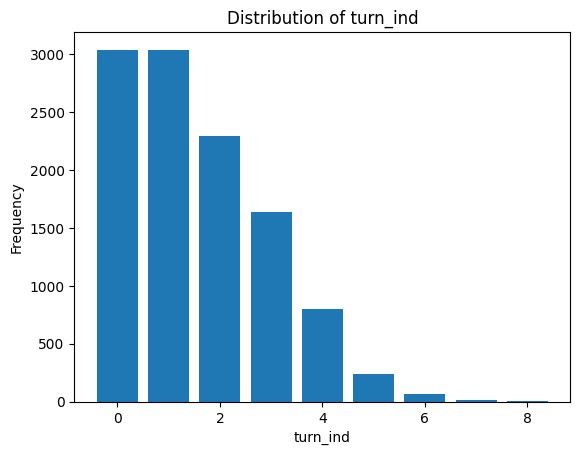

In [124]:
from collections import Counter
import matplotlib.pyplot as plt
import json

# Load your dataset (update the path if needed)
#with open('your_dataset.json', 'r') as f:
#    data = json.load(f)

# Extract 'turn_ind' values from the annotation field
turn_inds = [entry['annotation']['turn_ind'] for entry in ConvfinQA_turn_train_data if 'turn_ind' in entry['annotation']]

# Count frequency of each turn_ind value
counter = Counter(turn_inds)

# Print the distribution
print("Distribution of 'turn_ind':")
for k, v in sorted(counter.items()):
    print(f"Turn {k}: {v} samples")

# Plot histogram
plt.bar(counter.keys(), counter.values())
plt.xlabel('turn_ind')
plt.ylabel('Frequency')
plt.title('Distribution of turn_ind')
plt.show()


**ConvFinQA: Each training example is a dictionary with 8 keys:** <br>
"pre_text": the texts before the table; <br>
"post_text": the text after the table;<br>
"filename": name of the pdf file <br>
"table_ori": The original version of the table, as extracted from the document, before any preprocessing or normalization.<br>
"table": the table;<br>
"qa": {<br>
  "question": the question;<br>
  "answer": The final numeric/textual answer to the question.<br>
  "ann_table_rows": Indices of table rows that are annotated as relevant (if the answer comes from a table).<br>
  "ann_text_rows": Indices of relevant text passages (e.g., [1] refers to text_1) from model_input.<br>
  "steps" ("op": operation, "arg1; arg2": operands; "res": result of the operation:  The symbolic execution steps used to compute the answer.<br>
  "program": the reasoning program;<br>
  "gold_inds": the gold supporting facts;<br>
  "exe_ans": the execution results of each question turn. ;<br>
}<br>
"id": unique example id. <br>
"annotation": {<br>
  "original_program": original FinQA question;<br>
  "dialogue_break": the conversation, as a list of question turns. <br>
  "turn_program": the ground truth program for each question, corresponding to the list in "dialogue_break".<br>
  "cur_pogram":Current program for this turn.<br>
  "cur_dial":Current dialogue turn.<br>
  "gold_ind": Highlighted content for evidence.<br>
  "turn_ind": Index of this turn in the full dialogue.<br>
  "exe_ans_list": the execution results of each question turn. <br>
}<br>

#### FinDER

In [ ]:
import json
from pathlib import Path

finder_train_file = Path("/Users/christel/Desktop/Thesis/thesis_repo/data/FinDER/train.jsonl")
finder_train_data = []
with open(finder_train_file, 'r') as f:
    for line in f:
        finder_train_data.append(json.loads(line))

print(f"Loaded {len(finder_train_data)} training examples")
print(f"Data type: {type(finder_train_data)}")

In [ ]:
# Inspect the structure of the first sample
finder_first_sample = finder_train_data[0]
print(f"Sample type: {type(finder_first_sample)}")
print(f"Sample keys: {list(finder_first_sample.keys())}")
print(f"Number of keys: {len(finder_first_sample.keys())}")

In [ ]:
print(finder_train_data[0])

In [ ]:
# Detailed inspection of the first sample
for key, value in finder_first_sample.items():
    print(f"\n📋 {key}:")
    if isinstance(value, str):
        print(f"   Type: string (length: {len(value)})")
        print(f"   Preview: {value[:100]}{'...' if len(value) > 100 else ''}")
    elif isinstance(value, list):
        print(f"   Type: list (length: {len(value)})")
        if len(value) > 0:
            print(f"   First item type: {type(value[0])}")
            if isinstance(value[0], dict):
                print(f"   First item keys: {list(value[0].keys())}")
    elif isinstance(value, dict):
        print(f"   Type: dict (keys: {list(value.keys())})")
    else:
        print(f"   Type: {type(value)}")
        print(f"   Value: {value}")

**FinDER: Each training example is a dictionary with 7 keys:** <br>
"id": unique identifier.<br>
"text": query that the model is expected to answer.<br>
"reasoning": ndicates whether the question requires reasoning (e.g. logical inference, arithmetic operations) rather than simple lookup. true = reasoning required.<br>
"category": The semantic category of the question (e.g., Financials, Company overview, Footnotes, etc.).<br>
"references": The source text passages (e.g., extracted from tables or footnotes) that the model should consider when answering the question. <br>
"answer": The reference answer that the model should produce.<br>
"types": Indicates the type of reasoning required to arrive at the answer. <br>


### **2. Construct the final dataset**<br>
Since the original datasets are of varying structures we will in the following create a canonical schema to avoid confounds and log identical signals across runs. It'll contain only the fields that are relevant for retrieval, answer checking , and analysis. The goal is to construct a dataset where each row can be fed straight into the each of the RAG models with no dataset-specific branches. <br>



The final dataset has the following structure: <br>

{
  "qid"          : "string",     // dataset-prefix + original id <br>
  "dataset"      : "FinQA | ConvFinQA | FinDER",<br>
  "question"     : "string",<br>
  "answer"       : "string",     // canonicalised (see §4)<br>
  "context_text" : ["string"],   // list of text passages (sentences or 100-token chunks)<br>
  "context_table": [["string"]], // normalised table (may be [])<br>
  "reasoning"    : true|false,   // FinDER field → others: len(steps)>1<br>
  "reason_type"  : "string|null",// FinDER.type or Conv/FinQA program tag<br>
  "gold_text_id" : ["string"],   // evidence indices, empty if not provided<br>
  "gold_table_row":[int],        // ^ <br>
  "meta"         : { ... }       // any extra fields you still need<br>
}

#### **2.1 Preprocess datasets**

##### 2.1.1 FinQA

We sentence-split each pre_text/post_text, then concatenate adjacent sentences until the segment is ≤ 100 BPE tokens. This follows best practice in prior RAG work (Lewis 2020; Izacard 2021) and balances retrieval precision with embedding quality.

In [42]:
import pandas as pd

In [43]:
df_finqa = pd.read_json("/Users/christel/Desktop/Thesis/thesis_repo/data/FinQA/train.json")

In [44]:
# This will print the first 5 'program' entries from the nested 'qa' dict
for i, qa_dict in enumerate(df_finqa['qa'][:5]):
    print(f"Sample {i+1} program:", qa_dict.get("program", ""))

Sample 1 program: divide(100, 100), divide(3.8, #0)
Sample 2 program: multiply(607, 18.13), multiply(#0, const_1000), multiply(3.3, const_1000000), greater(#1, #2)
Sample 3 program: divide(9896, 23.6%)
Sample 4 program: divide(14001, 26302)
Sample 5 program: subtract(959.2, 991.1), divide(#0, 991.1)


In [45]:
# pre-process finqa with the function in data_utils.py
import sys
import json
import random
from pathlib import Path 
# Adjust the path to the root of your project
project_root = Path('/Users/christel/Desktop/Thesis/thesis_repo')  # replace with your actual path
sys.path.append(str(project_root))

from src.data_utils import transform_finqa_dataset

In [46]:
with open("/Users/christel/Desktop/Thesis/thesis_repo/data/FinQA/train.json") as f:
    finqa_data = json.load(f)

transformed_finqa_data = transform_finqa_dataset(finqa_data)

In [47]:
for k, v in transformed_finqa_data[0].items():
    print(f"{k}: {v}\n")

ID: ADI/2009/page_49.pdf

question: what is the the interest expense in 2009?

answer: 380

context: ['interest rate to a variable interest rate based on the three-month libor plus 2.05% ( 2.05 % ) ( 2.34% ( 2.34 % ) as of october 31 , 2009 ) .', 'if libor changes by 100 basis points , our annual interest expense would change by $ 3.8 million .', 'foreign currency exposure as more fully described in note 2i .', 'in the notes to consolidated financial statements contained in item 8 of this annual report on form 10-k , we regularly hedge our non-u.s .', 'dollar-based exposures by entering into forward foreign currency exchange contracts .', 'the terms of these contracts are for periods matching the duration of the underlying exposure and generally range from one month to twelve months .', 'currently , our largest foreign currency exposure is the euro , primarily because our european operations have the highest proportion of our local currency denominated expenses .', 'relative to foreign

In [48]:
df_finqa = pd.DataFrame(transformed_finqa_data)

# check for missing values
df_finqa.head()

,ID,question,answer,context,gold_context,operation
0,ADI/2009/page_49.pdf,what is the the interest expense in 2009?,380,['interest rate to a variable interest rate ba...,{'text_1': 'if libor changes by 100 basis poin...,"divide(100, 100), divide(3.8, #0)"
1,ABMD/2012/page_75.pdf,"during the 2012 year , did the equity awards i...",,"['abiomed , inc .', 'and subsidiaries notes to...",{'table_2': 'the granted of number of shares (...,"multiply(607, 18.13), multiply(#0, const_1000)..."
2,AAL/2018/page_13.pdf,what was the total operating expenses in 2018 ...,41932,['the following table shows annual aircraft fu...,{'table_1': 'year the 2018 of gallons is 4447 ...,"divide(9896, 23.6%)"
3,INTC/2013/page_71.pdf,what percentage of total cash and investments ...,53%,['the fair value of our grants receivable is d...,{'table_1': '( in millions ) the available-for...,"divide(14001, 26302)"
4,ETR/2008/page_313.pdf,what is the growth rate in net revenue in 2008?,-3.2%,"[""entergy louisiana , llc management's financi...",{'table_1': 'the 2007 net revenue of amount ( ...,"subtract(959.2, 991.1), divide(#0, 991.1)"


In [49]:
print("Comprehensive check for missing or empty values per column:\n")
print(f"Number of rows: {len(df_finqa)}")

for column in df_finqa.columns:
    # Check for NaN/None using isnull()
    null_count = df_finqa[column].isnull().sum()
    
    # Check for empty strings, but only if the column is of a string/object type
    empty_string_count = 0
    if df_finqa[column].dtype == 'object':
        empty_string_count = (df_finqa[column] == '').sum()
        
    # Calculate total "missing" or "empty"
    total_missing = null_count + empty_string_count
    
    if total_missing > 0:
        print(f"Column '{column}':")
        print(f"  - Null/NaN values: {null_count}")
        print(f"  - Empty strings ('') values: {empty_string_count}")
        print(f"  - Total missing/empty: {total_missing}\n")
    else:
        print(f"Column '{column}': Clean (0 missing or empty values)")


Comprehensive check for missing or empty values per column:

Number of rows: 6251
Column 'ID': Clean (0 missing or empty values)
Column 'question': Clean (0 missing or empty values)
Column 'answer':
  - Null/NaN values: 0
  - Empty strings ('') values: 48
  - Total missing/empty: 48

Column 'context': Clean (0 missing or empty values)
Column 'gold_context': Clean (0 missing or empty values)
Column 'operation': Clean (0 missing or empty values)


Drop all rows where data is missing

In [68]:
finqa_cleaned = df_finqa[~(df_finqa['answer'].isnull() | (df_finqa['answer'] == ''))].copy()

# Optionally, reset the index
finqa_cleaned.reset_index(drop=True, inplace=True)
print(f"Rows before dropping missing answers: {len(df_finqa)}")
print(f"Rows after dropping missing answers: {len(finqa_cleaned)}")

Rows before dropping missing answers: 6251
Rows after dropping missing answers: 6203


##### 2.1.2 ConvFinQa

In [5]:
import pandas as pd

In [30]:
# pre-process finqa with the function in data_utils.py
import sys
import json
import random
from pathlib import Path 
# Adjust the path to the root of your project
project_root = Path('/Users/christel/Desktop/Thesis/thesis_repo')  # replace with your actual path
sys.path.append(str(project_root))

from src.data_utils import transform_convfinqa_dataset

In [92]:
def transform_convfinqa_dataset3(convfinqa_data):
    """
    Transforms ConvFinQA dataset into a flat format where the 'question' field
    includes the full conversation history (Q+A) followed by the current question (no answer).

    Args:
        convfinqa_data (list of dict): The original ConvFinQA data.

    Returns:
        list of dict: Transformed dataset with conversation history.
    """
    transformed = []
    for sample in convfinqa_data:
        # Compose context: pre_text + table + post_text
        pre_text = sample.get("pre_text", "")
        table = sample.get("table", "")
        post_text = sample.get("post_text", "")

        if isinstance(table, list):
            table_str = "\n".join(["\t".join(map(str, row)) for row in table])
        else:
            table_str = str(table)
        context = f"{pre_text}\n{table_str}\n{post_text}".strip()

        # Extract fields
        qa_dict = sample.get("qa", {})
        ann_dict = sample.get("annotation", {})

        # Turn index (position in conversation)
        turn_ind = ann_dict.get("turn_ind", 0)

        # Conversation history
        dialogue = ann_dict.get("dialogue_break", [])
        answers = ann_dict.get("answer_list", [])

        # Construct question with history (up to current turn)
        question_turns = []
        for i in range(turn_ind):
            question_turns.append(f"Q: {dialogue[i]}")
            if i < len(answers):
                question_turns.append(f"A: {answers[i]}")
        if turn_ind < len(dialogue):
            question_turns.append(f"Q: {dialogue[turn_ind]}")  # final question

        full_question = "\n".join(question_turns)

        transformed.append({
            "ID": sample.get("filename", ""),
            "question": full_question,
            "answer": qa_dict.get("answer", ""),
            "context": context,
            "gold_context": qa_dict.get("gold_inds", []),
            "operation": qa_dict.get("program", ""),
            "turn_ind": turn_ind
        })
    return transformed


In [93]:
with open("/Users/christel/Desktop/Thesis/thesis_repo/data/ConFinQA/train_turn.json") as f:
    convfinqa_data = json.load(f)

transformed_convfinqa_data = transform_convfinqa_dataset3(convfinqa_data)

In [100]:
for k, v in transformed_convfinqa_data[7].items():
    print(f"{k}: {v}\n")

ID: RSG/2008/page_114.pdf

question: Q: what were revenues in 2008?
A: 9362.2
Q: what were they in 2007?
A: 9244.9
Q: what was the net change?
A: A0
Q: what is the percent change?

answer: 1.3%

context: ['substantially all of the goodwill and other intangible assets recorded related to the acquisition of allied are not deductible for tax purposes .', 'pro forma information the consolidated financial statements presented for republic include the operating results of allied from the date of the acquisition .', 'the following pro forma information is presented assuming the merger had been completed as of january 1 , 2007 .', 'the unaudited pro forma information presented below has been prepared for illustrative purposes and is not intended to be indicative of the results of operations that would have actually occurred had the acquisition been consummated at the beginning of the periods presented or of future results of the combined operations ( in millions , except share and per share am

In [101]:
print("Comprehensive check for missing or empty values per column:\n")
print(f"Number of rows: {len(df_convfinqa)}")

for column in df_convfinqa.columns:
    # Check for NaN/None using isnull()
    null_count = df_convfinqa[column].isnull().sum()
    
    # Check for empty strings, but only if the column is of a string/object type
    empty_string_count = 0
    if df_convfinqa[column].dtype == 'object':
        empty_string_count = (df_convfinqa[column] == '').sum()
        
    # Calculate total "missing" or "empty"
    total_missing = null_count + empty_string_count
    
    if total_missing > 0:
        print(f"Column '{column}':")
        print(f"  - Null/NaN values: {null_count}")
        print(f"  - Empty strings ('') values: {empty_string_count}")
        print(f"  - Total missing/empty: {total_missing}\n")
    else:
        print(f"Column '{column}': Clean (0 missing or empty values)")


Comprehensive check for missing or empty values per column:

Number of rows: 11104
Column 'ID': Clean (0 missing or empty values)
Column 'question': Clean (0 missing or empty values)
Column 'answer':
  - Null/NaN values: 0
  - Empty strings ('') values: 3712
  - Total missing/empty: 3712

Column 'context': Clean (0 missing or empty values)
Column 'gold_context': Clean (0 missing or empty values)
Column 'operation':
  - Null/NaN values: 0
  - Empty strings ('') values: 3642
  - Total missing/empty: 3642

Column 'turn_ind': Clean (0 missing or empty values)


In [102]:
# Replace empty strings with NaN
convfinqa_cleaned = df_convfinqa.replace('', pd.NA)

# Drop any row that has at least one NaN (including ones that were empty strings)
convfinqa_cleaned = convfinqa_cleaned.dropna(how='any')

# Reset index (optional)
convfinqa_cleaned.reset_index(drop=True, inplace=True)

# Print stats
print(f"Rows before cleaning: {len(df_convfinqa)}")
print(f"Rows after dropping rows with any missing/empty values: {len(convfinqa_cleaned)}")


Rows before cleaning: 11104
Rows after dropping rows with any missing/empty values: 7392


In [103]:
convfinqa_cleaned2 = convfinqa_cleaned[convfinqa_cleaned['turn_ind'] > 0]
print(f"Rows after dropping rows with any missing/empty values: {len(convfinqa_cleaned)}")
print(f"Rows after dropping rows with no conversation history: {len(convfinqa_cleaned2)}")

Rows after dropping rows with any missing/empty values: 7392
Rows after dropping rows with no conversation history: 5302


In [109]:
convfinqa_cleaned2.drop(columns=["turn_ind"], inplace=True)

/var/folders/dn/6ts4tw3s5_771t7m76_gjlq40000gn/T/ipykernel_76120/3890940492.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  convfinqa_cleaned2.drop(columns=["turn_ind"], inplace=True)


In [110]:
convfinqa_cleaned2.head()

,ID,question,answer,context,gold_context,operation
1,JKHY/2009/page_28.pdf,Q: what is the net cash from operating activit...,14.1%,"['26 | 2009 annual report in fiscal 2008 , rev...",{'table_6': '2008 the net cash from operating ...,"subtract(206588, 181001), divide(#0, 181001)"
2,JKHY/2009/page_28.pdf,Q: what is the net cash from operating activit...,14.1%,"['26 | 2009 annual report in fiscal 2008 , rev...",{'table_6': '2008 the net cash from operating ...,"subtract(206588, 181001), divide(#0, 181001)"
3,JKHY/2009/page_28.pdf,Q: what is the net cash from operating activit...,14.1%,"['26 | 2009 annual report in fiscal 2008 , rev...",{'table_6': '2008 the net cash from operating ...,"subtract(206588, 181001), divide(#0, 181001)"
5,RSG/2008/page_114.pdf,Q: what were revenues in 2008?\nA: 9362.2\nQ: ...,1.3%,['substantially all of the goodwill and other ...,{'table_1': 'the revenue of year ended decembe...,"subtract(9362.2, 9244.9), divide(#0, 9244.9)"
6,RSG/2008/page_114.pdf,Q: what were revenues in 2008?\nA: 9362.2\nQ: ...,1.3%,['substantially all of the goodwill and other ...,{'table_1': 'the revenue of year ended decembe...,"subtract(9362.2, 9244.9), divide(#0, 9244.9)"


In [111]:
print(f"Rows after dropping rows with no conversation history: {len(convfinqa_cleaned2)}")

Rows after dropping rows with no conversation history: 5302


In [112]:
print("Comprehensive check for missing or empty values per column:\n")
print(f"Number of rows: {len(convfinqa_cleaned2)}")

for column in convfinqa_cleaned2.columns:
    # Check for NaN/None using isnull()
    null_count = convfinqa_cleaned2[column].isnull().sum()
    
    # Check for empty strings, but only if the column is of a string/object type
    empty_string_count = 0
    if convfinqa_cleaned2[column].dtype == 'object':
        empty_string_count = (convfinqa_cleaned2[column] == '').sum()
        
    # Calculate total "missing" or "empty"
    total_missing = null_count + empty_string_count
    
    if total_missing > 0:
        print(f"Column '{column}':")
        print(f"  - Null/NaN values: {null_count}")
        print(f"  - Empty strings ('') values: {empty_string_count}")
        print(f"  - Total missing/empty: {total_missing}\n")
    else:
        print(f"Column '{column}': Clean (0 missing or empty values)")

Comprehensive check for missing or empty values per column:

Number of rows: 5302
Column 'ID': Clean (0 missing or empty values)
Column 'question': Clean (0 missing or empty values)
Column 'answer': Clean (0 missing or empty values)
Column 'context': Clean (0 missing or empty values)
Column 'gold_context': Clean (0 missing or empty values)
Column 'operation': Clean (0 missing or empty values)


##### 2.1.3 FinDER

In [62]:
def transform_finder_dataset(finder_data):
    """
    Transforms FinDER dataset into a unified format for RAG evaluation.

    Args:
        finder_data (list of dict): The original FinDER dataset.

    Returns:
        list of dict: Transformed dataset.
    """
    transformed = []
    for sample in finder_data:
        transformed.append({
            "ID": sample.get("_id", ""),
            "question": sample.get("text", ""),
            "answer": sample.get("answer", ""),
            "context": sample.get("references", ""),
            "gold_context": "",  # Empty as FinDER has no gold context
            "operation": sample.get("type", "")
        })
    return transformed


In [ ]:
from data_utils import preprocess_finder_dataset

In [55]:
import json

finder_data = []
with open('/Users/christel/Desktop/Thesis/thesis_repo/data/FinDER/train.jsonl', 'r') as f:
    for line in f:
        finder_data.append(json.loads(line))

In [63]:
finder_transformed = transform_finder_dataset(finder_data)
df_finder = pd.DataFrame(finder_transformed)

In [64]:
df_finder.head()

,ID,question,answer,context,gold_context,operation
0,b33fcee7,Delta in CBOE Data & Access Solutions rev from...,The Data and Access Solutions revenue increase...,"[Cboe Global Markets, Inc. and Subsidiaries\n\...",,Subtract
1,b8a1383c,CBOE CBA expiring may impact union representat...,The three building engineers represent approxi...,"[Employees\n\nAs of December 31, 2023, we empl...",,Compositional
2,9826209b,Cboe's earnings impact from market data vs reg...,The data provided shows that Cboe Global Marke...,[North\n\n\n\n\n\n\n\n\n\n\nCorporate\n\n\n\n\...,,None
3,30eb0cd9,Cboe’s repurchase costs & the impact of its au...,The available data on share repurchase activit...,"[In 2011, the Board of Directors approved an i...",,None
4,1a4cebce,"Cboe's operational stability, governance in cy...",Cboe Global Markets Inc.'s multi-layered cyber...,"[We maintain policies, procedures and controls...",,None


In [65]:
print("Comprehensive check for missing or empty values per column:\n")
print(f"Number of rows: {len(df_finder)}")

for column in df_finder.columns:
    # Check for NaN/None using isnull()
    null_count = df_finder[column].isnull().sum()
    
    # Check for empty strings, but only if the column is of a string/object type
    empty_string_count = 0
    if df_finder[column].dtype == 'object':
        empty_string_count = (df_finder[column] == '').sum()
        
    # Calculate total "missing" or "empty"
    total_missing = null_count + empty_string_count
    
    if total_missing > 0:
        print(f"Column '{column}':")
        print(f"  - Null/NaN values: {null_count}")
        print(f"  - Empty strings ('') values: {empty_string_count}")
        print(f"  - Total missing/empty: {total_missing}\n")
    else:
        print(f"Column '{column}': Clean (0 missing or empty values)")


Comprehensive check for missing or empty values per column:

Number of rows: 5703
Column 'ID': Clean (0 missing or empty values)
Column 'question': Clean (0 missing or empty values)
Column 'answer':
  - Null/NaN values: 0
  - Empty strings ('') values: 7
  - Total missing/empty: 7

Column 'context': Clean (0 missing or empty values)
Column 'gold_context':
  - Null/NaN values: 0
  - Empty strings ('') values: 5703
  - Total missing/empty: 5703

Column 'operation': Clean (0 missing or empty values)


In [66]:
finder_cleaned = df_finder[df_finder["answer"] != ""].copy()

In [67]:
print(f"Before: {len(df_finder)} rows")
print(f"After : {len(finder_cleaned)} rows (empty answers removed)")

Before: 5703 rows
After : 5696 rows (empty answers removed)


In [113]:
import json

# Save FinQA
#finqa_cleaned.to_json("/Users/christel/Desktop/Thesis/thesis_repo/data/data_processed/finqa_processed.json", orient="records", lines=True)


# Save ConvFinQA
convfinqa_cleaned2.to_json("/Users/christel/Desktop/Thesis/thesis_repo/data/data_processed/convfinqa_processed.json", orient="records", lines=True)

# Save FinDER
#finder_cleaned.to_json("/Users/christel/Desktop/Thesis/thesis_repo/data/data_processed/finder_processed.json", orient="records", lines=True)

#### 2.2 Compare FinQA and ConvFinQA


Find unique questions in both datasets

In [114]:
finqa_qas = set(
    (row.question.strip().lower(), row.answer.strip().lower())
    for row in finqa_cleaned.itertuples()
)

convfinqa_qas = set(
    (row.question.strip().lower(), row.answer.strip().lower())
    for row in convfinqa_cleaned2.itertuples()
)

In [115]:
only_in_finqa = finqa_qas - convfinqa_qas
only_in_convfinqa = convfinqa_qas - finqa_qas
in_both = finqa_qas & convfinqa_qas

print(f"Unique to FinQA: {len(only_in_finqa)}")
print(f"Unique to ConvFinQA: {len(only_in_convfinqa)}")
print(f"Shared between both: {len(in_both)}")

Unique to FinQA: 6142
Unique to ConvFinQA: 5299
Shared between both: 0


In [116]:
#length of all three datasets
print(f"FinQA length: {len(finqa_cleaned)}")
print(f"ConvFinQA length: {len(convfinqa_cleaned2)}")
print(f"FinDER length: {len(finder_cleaned)}")

FinQA length: 6203
ConvFinQA length: 5302
FinDER length: 5696


In [119]:
print(finqa_cleaned.columns)
print(convfinqa_cleaned2.columns)
print(finder_cleaned.columns)

Index(['ID', 'question', 'answer', 'context', 'gold_context', 'operation'], dtype='object')
Index(['ID', 'question', 'answer', 'context', 'gold_context', 'operation'], dtype='object')
Index(['ID', 'question', 'answer', 'context', 'gold_context', 'operation'], dtype='object')


#### 2.3 Merge Datasets 

In [149]:
# Add source columns
finqa_cleaned["source"] = "FinQA"
convfinqa_cleaned2["source"] = "ConvFinQA"
finder_cleaned["source"] = "FinDER"


finder_cleaned.head()

/var/folders/dn/6ts4tw3s5_771t7m76_gjlq40000gn/T/ipykernel_76120/2294378422.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  convfinqa_cleaned2["source"] = "ConvFinQA"


,ID,question,answer,context,gold_context,operation,source
0,b33fcee7,Delta in CBOE Data & Access Solutions rev from...,The Data and Access Solutions revenue increase...,"[Cboe Global Markets, Inc. and Subsidiaries\n\...",,Subtract,FinDER
1,b8a1383c,CBOE CBA expiring may impact union representat...,The three building engineers represent approxi...,"[Employees\n\nAs of December 31, 2023, we empl...",,Compositional,FinDER
2,9826209b,Cboe's earnings impact from market data vs reg...,The data provided shows that Cboe Global Marke...,[North\n\n\n\n\n\n\n\n\n\n\nCorporate\n\n\n\n\...,,None,FinDER
3,30eb0cd9,Cboe’s repurchase costs & the impact of its au...,The available data on share repurchase activit...,"[In 2011, the Board of Directors approved an i...",,None,FinDER
4,1a4cebce,"Cboe's operational stability, governance in cy...",Cboe Global Markets Inc.'s multi-layered cyber...,"[We maintain policies, procedures and controls...",,None,FinDER


In [150]:
# Merge all datasets
combined_df = pd.concat(
    [finqa_cleaned, convfinqa_cleaned2, finder_cleaned],
    axis=0,
    ignore_index=True
)

# Preview
print(combined_df["source"].value_counts())
print(combined_df.head())

source
FinQA        6203
FinDER       5696
ConvFinQA    5302
Name: count, dtype: int64
                      ID                                           question  \
0   ADI/2009/page_49.pdf          what is the the interest expense in 2009?   
1   AAL/2018/page_13.pdf  what was the total operating expenses in 2018 ...   
2  INTC/2013/page_71.pdf  what percentage of total cash and investments ...   
3  ETR/2008/page_313.pdf    what is the growth rate in net revenue in 2008?   
4    C/2010/page_272.pdf  what was the growth rate of the loans held-for...   

   answer                                            context  \
0     380  ['interest rate to a variable interest rate ba...   
1   41932  ['the following table shows annual aircraft fu...   
2     53%  ['the fair value of our grants receivable is d...   
3   -3.2%  ["entergy louisiana , llc management's financi...   
4  56.25%  ['the significant changes from december 31 , 2...   

                                        gold_context 

In [151]:
print(len(combined_df))

17201


In [152]:
print(combined_df.isnull().sum())

ID              0
question        0
answer          0
context         0
gold_context    0
operation       0
source          0
dtype: int64


In [153]:
print("Rows with any missing value:", combined_df.isnull().any(axis=1).sum())

Rows with any missing value: 0


In [154]:
print((combined_df == None).sum())

ID              0
question        0
answer          0
context         0
gold_context    0
operation       0
source          0
dtype: int64


In [155]:
unique_reason_types = combined_df['operation'].dropna().unique().tolist()
print(unique_reason_types)

['divide(100, 100), divide(3.8, #0)', 'divide(9896, 23.6%)', 'divide(14001, 26302)', 'subtract(959.2, 991.1), divide(#0, 991.1)', 'divide(2.5, 1.6), divide(#0, 1.6)', 'add(75.0, 72.7), divide(#0, 20)', 'divide(1786.2, 2807.0)', 'subtract(34.8, 1.2), divide(#0, 34.8), multiply(#1, const_100)', 'multiply(1327657, 42.61), divide(#0, const_1000000)', 'subtract(2309.9, 2303.0)', 'divide(1733, 2655)', 'subtract(440.9, 442.3), divide(#0, 442.3)', 'divide(1947, 7018)', 'divide(1733, 2640)', 'divide(37788, 186792)', 'divide(726.6, 6039.0)', 'divide(const_3, 83)', 'divide(439, 470)', 'divide(12, 261)', 'subtract(10, 12), divide(#0, 12)', 'subtract(35764, 22176)', 'subtract(15, 8)', 'divide(303, 304)', 'divide(7991, 21367)', 'subtract(23.59, 28.37), divide(#0, 28.37)', 'subtract(14.6%, 13.0%)', 'subtract(78.0, 75.3), subtract(58.0, 49.9), subtract(54.0, 51.8), add(#0, #1), add(#2, #3)', 'add(2.1, 0.7), add(#0, 0.1), divide(#1, const_3)', 'subtract(1680, 1747), divide(#0, 1747)', 'table_average(20

In [156]:
# For both None and NaN (recommended)
df_reason_none = combined_df[combined_df['operation']=="None"]

df_reason_none.head()

,ID,question,answer,context,gold_context,operation,source
11507,9826209b,Cboe's earnings impact from market data vs reg...,The data provided shows that Cboe Global Marke...,[North\n\n\n\n\n\n\n\n\n\n\nCorporate\n\n\n\n\...,,None,FinDER
11508,30eb0cd9,Cboe’s repurchase costs & the impact of its au...,The available data on share repurchase activit...,"[In 2011, the Board of Directors approved an i...",,None,FinDER
11509,1a4cebce,"Cboe's operational stability, governance in cy...",Cboe Global Markets Inc.'s multi-layered cyber...,"[We maintain policies, procedures and controls...",,None,FinDER
11510,dd6f1e96,Fee model of Cboe incentivizes order flow liqu...,The provided text indicates that Cboe Global M...,[Competition\n\nThe industry in which we opera...,,None,FinDER
11511,a8300795,Cboe's legal proceedings and loss accrual crit...,Cboe Global Markets Inc. categorizes its legal...,"[Legal Proceedings\n\nAs of December 31, 2023,...",,None,FinDER


In [157]:
# Calculate the length of context_text for each row
context_lengths = combined_df['context'].apply(len)

# Find the minimum and maximum
min_context = context_lengths.min()
max_context = context_lengths.max()

print(f"Minimum context size: {min_context}")
print(f"Maximum context size: {max_context}")

Minimum context size: 1
Maximum context size: 16334


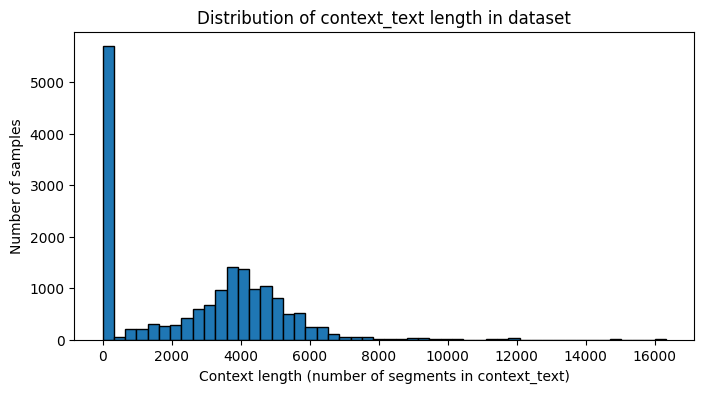

In [158]:
import matplotlib.pyplot as plt

# Calculate the length of context_text for each row
context_lengths = combined_df['context'].apply(len)

# Plot the distribution
plt.figure(figsize=(8, 4))
plt.hist(context_lengths, bins=50, edgecolor='black')
plt.xlabel("Context length (number of segments in context_text)")
plt.ylabel("Number of samples")
plt.title("Distribution of context_text length in dataset")
plt.show()

In [159]:
# Filter rows where context length is exactly 1
short_context_df = combined_df[combined_df["context"].apply(len) == 1]

# Print 5 examples
print(short_context_df.head(5)[["ID", "question", "context"]])

             ID                                           question  \
11505  b33fcee7  Delta in CBOE Data & Access Solutions rev from...   
11506  b8a1383c  CBOE CBA expiring may impact union representat...   
11507  9826209b  Cboe's earnings impact from market data vs reg...   
11508  30eb0cd9  Cboe’s repurchase costs & the impact of its au...   
11509  1a4cebce  Cboe's operational stability, governance in cy...   

                                                 context  
11505  [Cboe Global Markets, Inc. and Subsidiaries\n\...  
11506  [Employees\n\nAs of December 31, 2023, we empl...  
11507  [North\n\n\n\n\n\n\n\n\n\n\nCorporate\n\n\n\n\...  
11508  [In 2011, the Board of Directors approved an i...  
11509  [We maintain policies, procedures and controls...  


In [160]:
# Calculate the length of each answer
answer_lengths = combined_df['answer'].apply(lambda x: len(str(x)) if x is not None else 0)

# Find the minimum answer length
min_length = answer_lengths.min()
#print(f"Minimum answer length: {min_length}")

# Filter the DataFrame for samples with the shortest answer
shortest_answers_df = combined_df[answer_lengths == min_length]

print(shortest_answers_df[['question', 'answer']].shape)
shortest_answers_df[['question', 'answer']].head(5)

(77, 2)


,question,answer
21,what was the net notional amounts of purchases...,7
140,how much of the oil production is estimated to...,3
316,what was the ratio of the increase in the oper...,8
338,what is the liability for interest and penalti...,0
342,for 2001 what was the net change in aoci in mi...,2


In [161]:
empty_answer_count = combined_df['answer'].apply(lambda x: x is None or (isinstance(x, str) and x.strip() == "")).sum()
print(f"Number of samples with empty answers: {empty_answer_count}")

Number of samples with empty answers: 0


In [162]:
combined_df.shape

(17201, 7)

In [163]:
empty_question_count = combined_df['question'].apply(lambda x: x is None or (isinstance(x, str) and x.strip() == "")).sum()
print(f"Number of samples with empty questions: {empty_question_count}")

Number of samples with empty questions: 0


In [164]:
# Save Merged DF
combined_df.to_json("/Users/christel/Desktop/Thesis/thesis_repo/data/data_processed/merged_dataset.json", orient="records", lines=True)

### Splitting the dataset
To assess the retrievers performance on task that highlight different aspects of a retriever we are performing label-stratified hierarchical splitting. This preserves the statistical power tor per-category metrics while guaranteeing no lexical overlap that ouwld inflate retrieval accuracy. <br>

We define the following task-based labels to characterize the retrieval demands: <br>
- Lookup - targets retrieval precision, requiring direct fact retrieval from a single passage 
- Complex query - it assess the retrievers performance on vague or ambiguous queries 
- Multi-turn - Measures contextual understanding, evaluting how well the retriever incoporates dialogue history in conversational settings 

In addition to these primary categories, we also consider whether a question requires numerical reasoning with more than one input. This flag allows us to isolate retrieval performance in settings where agggregated or compositional evidence is required. This aspect however will not be used controlling the split but for the subsequent evaluation. <br>

Together, this labeling and splitting strategy ensures coverage across a meaningful spectrum of QA difficulty, grounded in the practical demands of financial document question answering. Stratified splitting ensures that each subset (train/val/test) reflects this diversity and preevnt data leakage. 

In [165]:
from sklearn.model_selection import train_test_split

In [166]:
import json

with open("/Users/christel/Desktop/Thesis/thesis_repo/data/data_processed/merged_dataset.json", 'r') as f:
    merged_dataset = [json.loads(line) for line in f]

df = pd.DataFrame(merged_dataset)


In [169]:
# First, split off the test set (10%)
train_val_df, test_df = train_test_split(
    df,
    test_size=0.1,
    stratify=df['source'],
    random_state=42
)

# Then, split the remaining into train (80%) and val (10%)
# Since test is 10%, train+val is 90%, so val should be 1/9 of train_val
val_size = 1 / 9

train_df, val_df = train_test_split(
    train_val_df,
    test_size=val_size,
    stratify=train_val_df['source'],
    random_state=42
)

print(f"Train: {len(train_df)}, Val: {len(val_df)}, Test: {len(test_df)}")

Train: 13760, Val: 1720, Test: 1721


In [171]:
print("Train split distribution:")
print(train_df['source'].value_counts(normalize=True))  # Shows proportions
print(train_df['source'].value_counts())               # Shows counts

print("\nValidation split distribution:")
print(val_df['source'].value_counts(normalize=True))
print(val_df['source'].value_counts())

print("\nTest split distribution:")
print(test_df['source'].value_counts(normalize=True))
print(test_df['source'].value_counts())

Train split distribution:
source
FinQA        0.360610
FinDER       0.331105
ConvFinQA    0.308285
Name: proportion, dtype: float64
source
FinQA        4962
FinDER       4556
ConvFinQA    4242
Name: count, dtype: int64

Validation split distribution:
source
FinQA        0.360465
FinDER       0.331395
ConvFinQA    0.308140
Name: proportion, dtype: float64
source
FinQA        620
FinDER       570
ConvFinQA    530
Name: count, dtype: int64

Test split distribution:
source
FinQA        0.360837
FinDER       0.331203
ConvFinQA    0.307960
Name: proportion, dtype: float64
source
FinQA        621
FinDER       570
ConvFinQA    530
Name: count, dtype: int64


In [172]:
train_df.to_json("/Users/christel/Desktop/Thesis/thesis_repo/data/data_processed/Train_Val_Test/df_train.json", orient="records")
val_df.to_json("/Users/christel/Desktop/Thesis/thesis_repo/data/data_processed/Train_Val_Test/df_val.json", orient="records")
test_df.to_json("/Users/christel/Desktop/Thesis/thesis_repo/data/data_processed/Train_Val_Test/df_test.json", orient="records")

In [173]:
train_df = pd.DataFrame(json.load(open("/Users/christel/Desktop/Thesis/thesis_repo/data/data_processed/Train_Val_Test/df_train.json")))

train_df.head()

,ID,question,answer,context,gold_context,operation,source
0,AAL/2018/page_13.pdf,what were total operating expenses in 2018?,41932,['the following table shows annual aircraft fu...,{'table_1': 'year the 2018 of gallons is 4447 ...,"divide(9896, 23.6%)",FinQA
1,CDW/2013/page_103.pdf,Q: what was the number of forfeited shares as ...,31.7%,['cdw corporation and subsidiaries notes to co...,{'text_0': 'cdw corporation and subsidiaries n...,"add(5931, 1200544), divide(#0, 3798508)",ConvFinQA
2,DRE/2012/page_31.pdf,Q: what was the net difference in general and ...,7.7%,['29 annual report 2012 duke realty corporatio...,{'table_4': 'general and administrative expens...,"subtract(46.4, 43.1), divide(#0, 43.1)",ConvFinQA
3,FRT/2006/page_133.pdf,what is the average of the deductions during t...,9813.66,['federal realty investment trust schedule iii...,{'table_2': 'balance december 31 2003 the dedu...,"add(1390, 15244), add(#0, 12807), divide(#1, c...",FinQA
4,ZBH/2003/page_42.pdf,what percent of total contractual obligations ...,5%,"['z i m m e r h o l d i n g s , i n c .', 'a n...",{'table_6': 'contractual obligations the total...,"divide(77.2, 1552.2)",FinQA
